                                                       RED WINE QUALITY TEST 

This dataset is related to red variants of the Portuguese "Vinho Verde" wine. 

These datasets can be viewed as classification tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [1]:
#IMPORTING ALL THE LIB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("E:/Data Analytics Project/New folder (3)/winequality-red.csv")
print(data)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


add Codeadd Markdown
From above data description we can conclude that value of density is almost similar throughout the dataset, because mean, min, 25%, 50%, 75% are all ~0.99.

So I am choosing to drop density feature as it will not have much significance in predicting quality of wine.


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

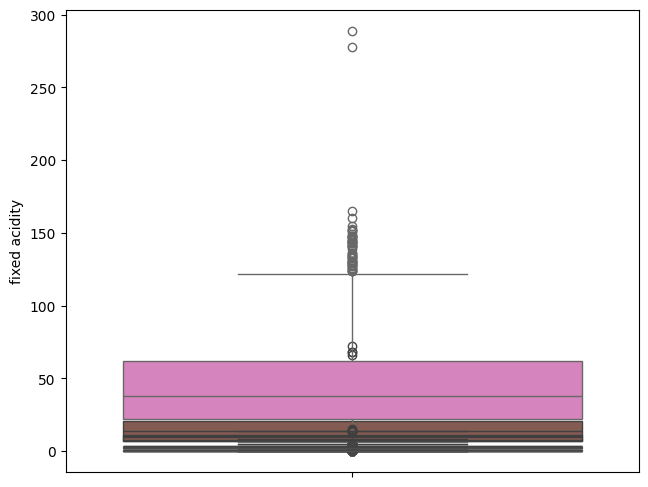

In [24]:
for i in data.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=data)
plt.tight_layout(pad=0.4)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

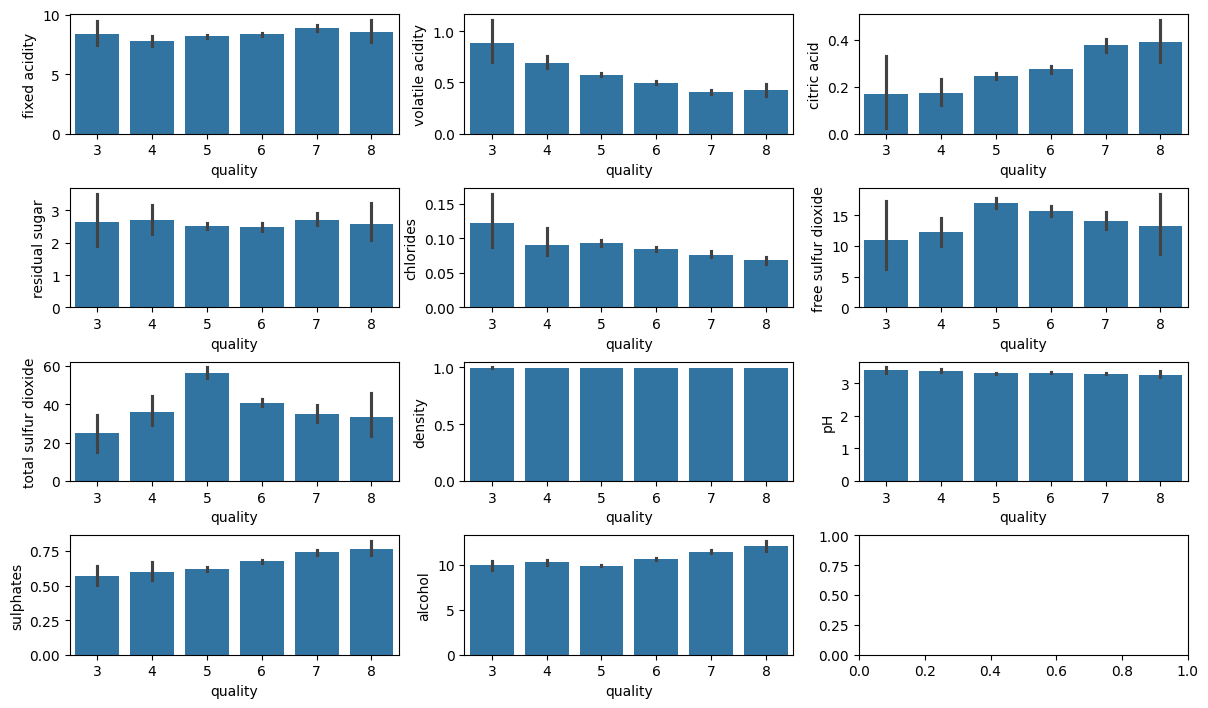

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize= (12,7))
ax = ax.flatten()
index=0
for i in data.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=data, ax = ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

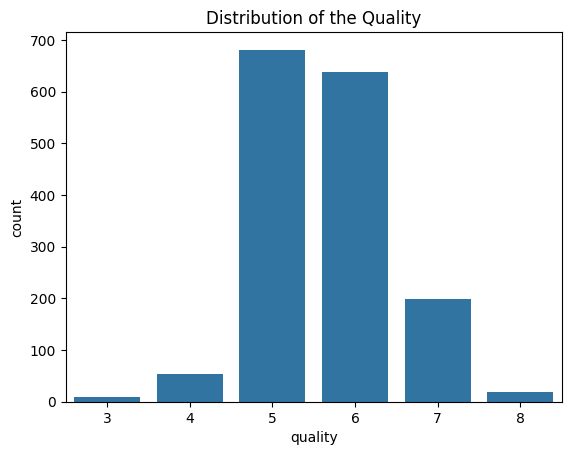

In [8]:
sns.countplot(x='quality', data=data)
plt.title('Distribution of the Quality')
plt.show()

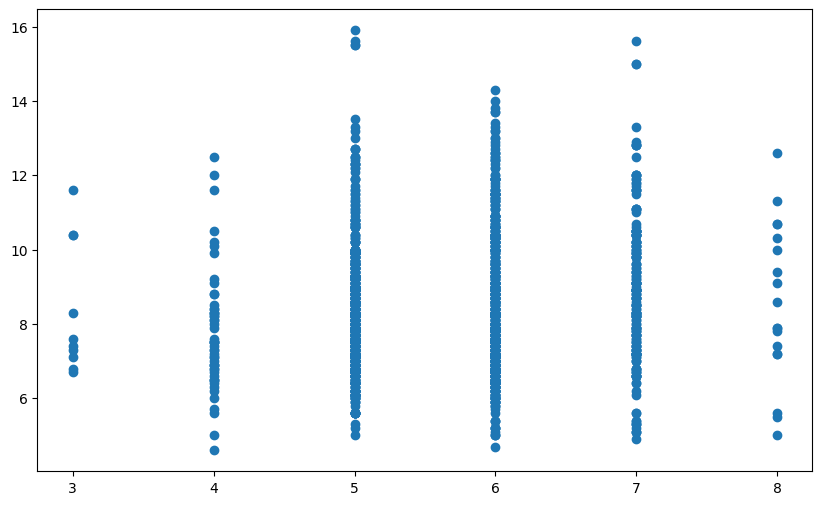

<Figure size 640x480 with 0 Axes>

In [18]:
fig = plt.figure(figsize = (10,6))
plt.scatter(x = 'quality', y = 'fixed acidity', data = data)
plt.show()
plt.savefig("scatter.png")

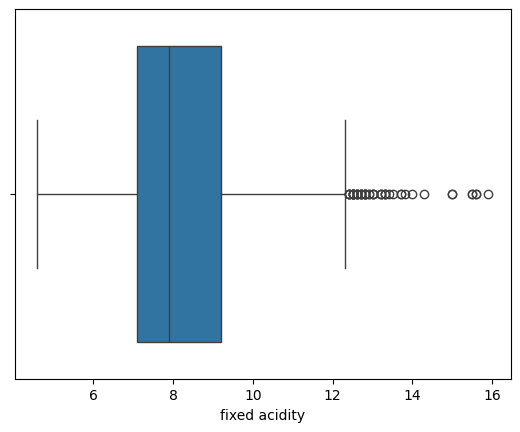

In [22]:
sns.boxplot(data=data, x='fixed acidity')
plt.show()

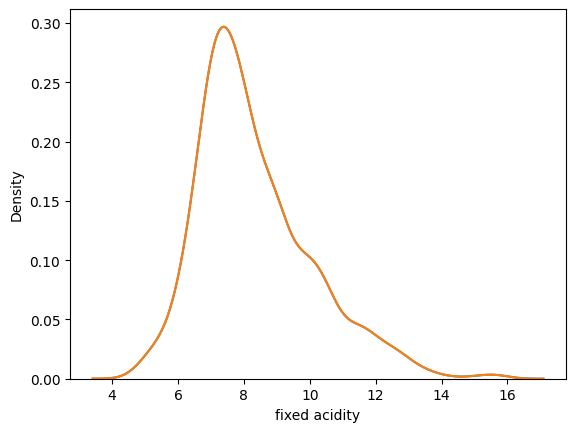

<Figure size 640x480 with 0 Axes>

In [27]:
sns.kdeplot(data['fixed acidity'], label='Original Data')
sns.kdeplot(data['fixed acidity'], label='Analysed Data')
plt.show()
plt.savefig("kdeplot.png")

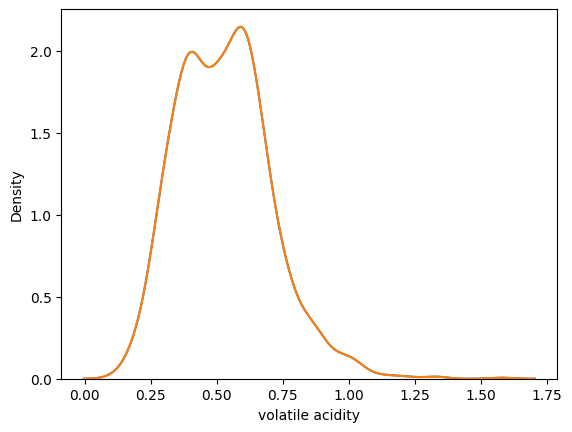

<Figure size 640x480 with 0 Axes>

In [29]:
sns.kdeplot(data['volatile acidity'], label='Original Data')
sns.kdeplot(data['volatile acidity'], label='Analysed Data')
plt.show()
plt.savefig("kdeplot.png")

In [47]:
gp = data.groupby(["density", "pH","quality"]).agg({"fixed acidity":"mean","volatile acidity":"mean","citric acid":"mean","residual sugar":"mean","chlorides":"mean","free sulfur dioxide":"mean","total sulfur dioxide":"mean","sulphates":"mean","alcohol":"mean"})
#print(gp)
gp.head()

,,,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
density,pH,quality,,,,,,,,,
0.99007,2.89,6,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.44,12.7
0.99020,3.49,6,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.66,13.6
0.99064,3.26,7,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.39,11.7
0.99080,3.50,8,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.82,14.0
0.99084,3.70,6,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.75,14.0


<Axes: ylabel='Count'>

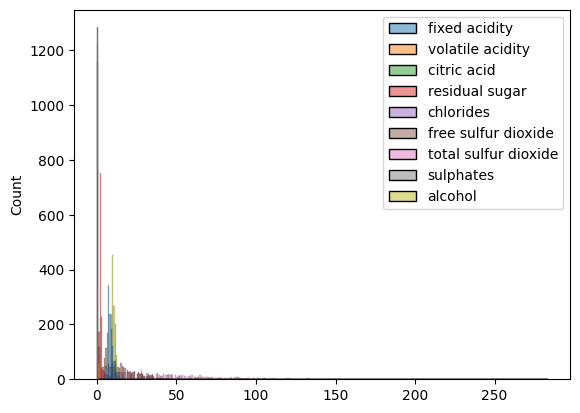

In [36]:
sns.histplot(gp)

<Axes: xlabel='citric acid'>

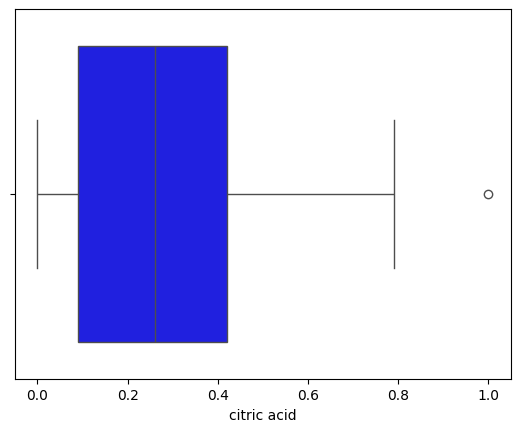

In [40]:
sns.boxplot(data=data, x='citric acid', color='blue')

<Axes: xlabel='residual sugar'>

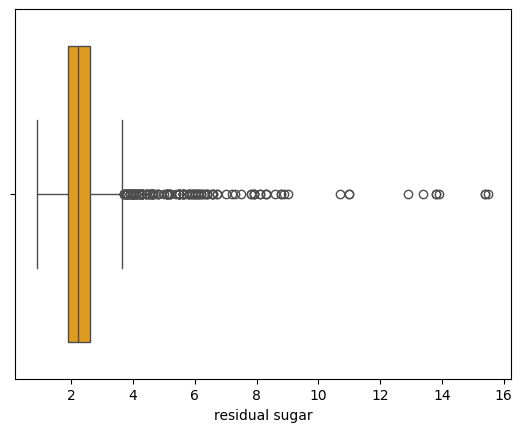

In [41]:
sns.boxplot(data=data, x='residual sugar', color='orange')

<Axes: xlabel='chlorides'>

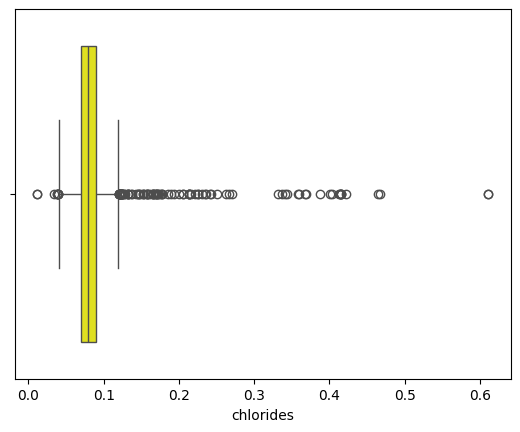

In [42]:
sns.boxplot(data=data, x='chlorides', color='yellow')

<Axes: xlabel='free sulfur dioxide'>

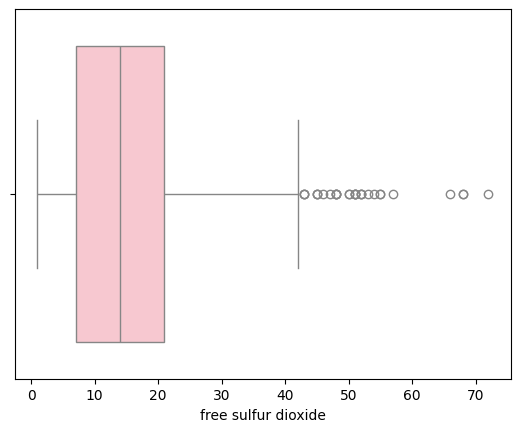

In [43]:
sns.boxplot(data=data, x='free sulfur dioxide', color='pink')

<Axes: xlabel='total sulfur dioxide'>

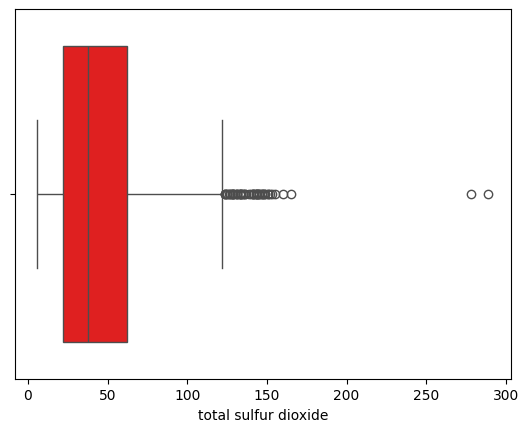

In [45]:
sns.boxplot(data=data, x='total sulfur dioxide', color='red')

<Axes: xlabel='sulphates'>

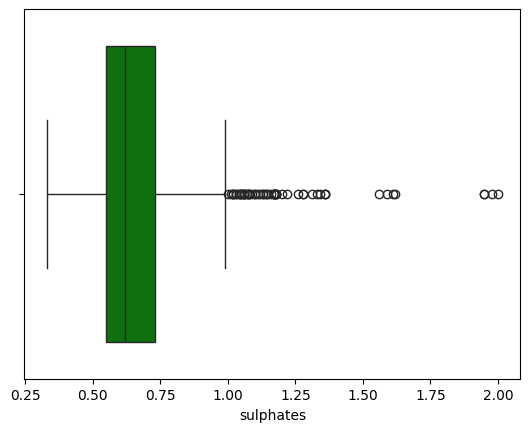

In [46]:
sns.boxplot(data=data, x='sulphates', color='green')

<Axes: xlabel='alcohol'>

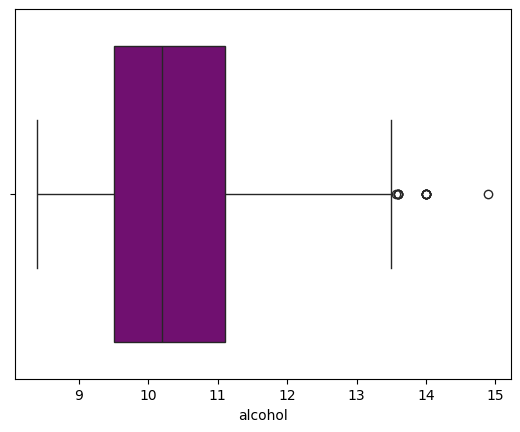

In [48]:
sns.boxplot(data=data, x='alcohol', color='purple')

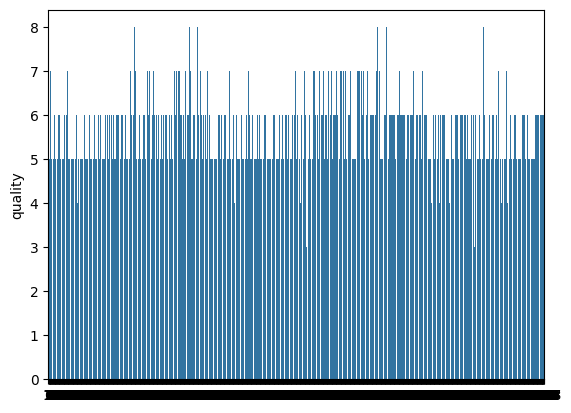

In [60]:
#plt.figure(figsize=(7,4))
sns.barplot(data['quality'])
plt.show()

<StemContainer object of 3 artists>

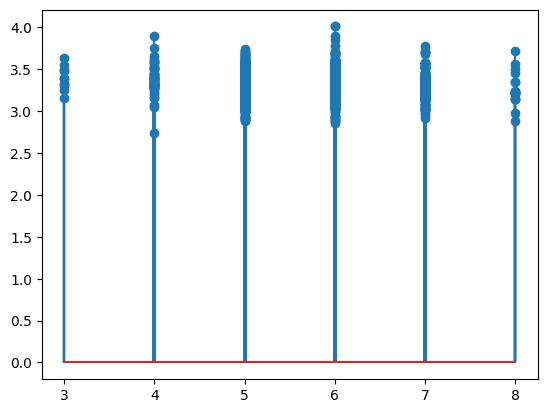

In [57]:
plt.stem(data["quality"], data["pH"])

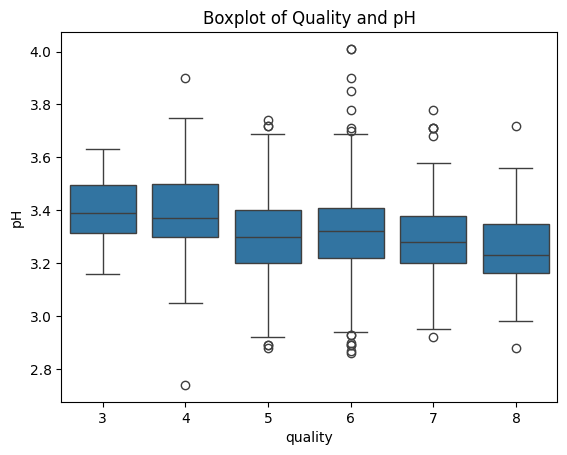

In [63]:
sns.boxplot(x='quality',y='pH',data=data)
plt.title("Boxplot of Quality and pH")
plt.show()